In [1]:
import PIL
import numpy as np
import os
import tensorflow as tf
import cv2
import keras
import pathlib
import glob
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy

### Loading the images

In [2]:
data_dir=pathlib.Path(os.getcwd()+"/maize_leaf_diseases_dataset/") 
maize_disease_dataset=list(glob.glob(f"{data_dir}/data/*.jpg"))
len(maize_disease_dataset)

4186

### Converting Images to Pixels

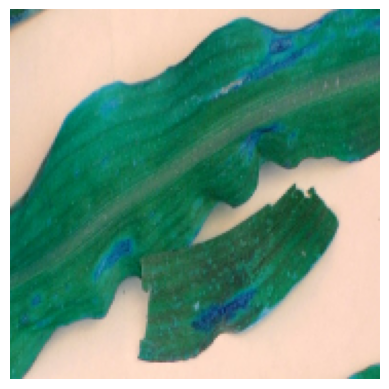

In [3]:
x=[]
for image in maize_disease_dataset:
    img=cv2.imread(str(image))#Convert image to pixels
    resized_img=cv2.resize(img,(180,180))#Images to be of same size
    x.append(resized_img)#Pixels
x=np.array(x) #Store pixels in numpy array
plt.imshow(x[0]) # Display the image using matplotlib
plt.axis('off')
plt.show()

In [4]:
print(x[0]) #Display pixels of a particular image

[[[ 29  86  77]
  [ 36  84  69]
  [ 28  84  60]
  ...
  [  1 110  84]
  [  1 103  75]
  [  2 109  86]]

 [[ 19  83  66]
  [ 24  79  58]
  [ 27  87  62]
  ...
  [  3 115  87]
  [  3 111  83]
  [  8 109  86]]

 [[ 25  85  71]
  [ 35  87  73]
  [ 30  85  69]
  ...
  [  5 120  95]
  [  4 118  96]
  [ 14 121 103]]

 ...

 [[ 26 135  96]
  [ 34 143 117]
  [ 20 136 105]
  ...
  [ 15 125  88]
  [ 16 124  85]
  [ 12 123  81]]

 [[ 22 131  96]
  [ 25 134 109]
  [ 17 133 106]
  ...
  [ 10 122  83]
  [ 11 116  79]
  [ 11 118  80]]

 [[ 20 131  97]
  [ 30 139 114]
  [ 26 140 119]
  ...
  [ 15 124  84]
  [ 14 117  81]
  [ 13 113  75]]]


### Training, Test Split

2930
1256
[[[0.64313725 0.62745098 0.65098039]
  [0.63921569 0.62745098 0.64705882]
  [0.64313725 0.63137255 0.65490196]
  ...
  [0.39215686 0.36078431 0.40392157]
  [0.32941176 0.29803922 0.34117647]
  [0.36470588 0.33333333 0.37254902]]

 [[0.63921569 0.62352941 0.64705882]
  [0.63529412 0.61960784 0.64313725]
  [0.63921569 0.62352941 0.64705882]
  ...
  [0.51764706 0.48627451 0.52941176]
  [0.43921569 0.40784314 0.45098039]
  [0.41176471 0.38039216 0.42352941]]

 [[0.65098039 0.63529412 0.65882353]
  [0.64313725 0.62745098 0.65098039]
  [0.65098039 0.63529412 0.65882353]
  ...
  [0.54901961 0.51764706 0.56078431]
  [0.54509804 0.51372549 0.55686275]
  [0.54901961 0.51764706 0.56078431]]

 ...

 [[0.55294118 0.50196078 0.52156863]
  [0.5372549  0.48235294 0.50588235]
  [0.51372549 0.45882353 0.48235294]
  ...
  [0.57254902 0.50980392 0.5372549 ]
  [0.55294118 0.49019608 0.51764706]
  [0.55686275 0.49411765 0.52156863]]

 [[0.51372549 0.45882353 0.48235294]
  [0.5254902  0.47058824 0.

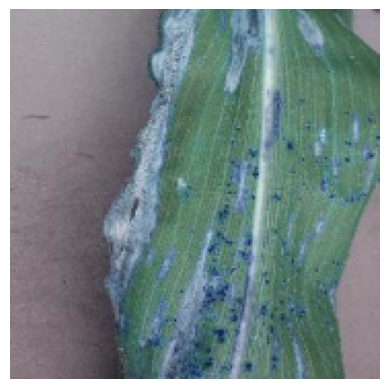

In [5]:
x_train,x_test=train_test_split(x,test_size=0.3,random_state=0) #Splitting
print(len(x_train))
print(len(x_test))

# Scalling
x_train_scaled=x_train/255 #Scale of 0.,1.0
x_test_scaled=x_test/255
print(x_train_scaled[0])
plt.imshow(x_train_scaled[0]) #Display image
plt.axis('off')
plt.show()

### Creating our Augmentation 1 Model

In [7]:
augmentation1=keras.Sequential([
    tf.keras.layers.RandomContrast(
    0.9, seed=None
)
])
augmented_training1=augmentation1(x_train_scaled)
print(augmented_training1[0])
current_dir=pathlib.Path(os.getcwd())
# try:
if not os.path.isdir(str(current_dir)+"\Augmented"):
    os.mkdir("Augmented")
os.chdir(str(current_dir)+"\Augmented")
for i in range(len(augmented_training1)):
    plt.imsave(f"Augmented1_img{i}.jpg",augmented_training1[i].numpy())
# except:
#     pass
# finally:
os.chdir(str(current_dir))
plt.imshow(augmented_training1[0].numpy())
plt.axis('off')
plt.show()

tf.Tensor(
[[[0.74353695 0.6884504  0.7226921 ]
  [0.73784024 0.6884504  0.71699536]
  [0.74353695 0.69414705 0.7283888 ]
  ...
  [0.37894943 0.30107617 0.36380127]
  [0.28780258 0.20992932 0.2726544 ]
  [0.3390727  0.2611994  0.31822783]]

 [[0.73784024 0.6827537  0.71699536]
  [0.7321435  0.677057   0.7112987 ]
  [0.73784024 0.6827537  0.71699536]
  ...
  [0.5612432  0.4833699  0.546095  ]
  [0.44730958 0.36943632 0.43216142]
  [0.40743282 0.32955956 0.39228466]]

 [[0.75493026 0.69984376 0.73408544]
  [0.74353695 0.6884504  0.7226921 ]
  [0.75493026 0.69984376 0.73408544]
  ...
  [0.60681665 0.52894336 0.5916685 ]
  [0.60111994 0.5232467  0.5859718 ]
  [0.60681665 0.52894336 0.5916685 ]]

 ...

 [[0.6125133  0.5061567  0.5347017 ]
  [0.58972657 0.47767323 0.51191497]
  [0.5555465  0.44349316 0.47773483]
  ...
  [0.6409967  0.51755    0.5574884 ]
  [0.6125133  0.48906657 0.529005  ]
  [0.61820996 0.49476326 0.5347017 ]]

 [[0.5555465  0.44349316 0.47773483]
  [0.57263654 0.46058318 0

ValueError: Floating point image RGB values must be in the 0..1 range.

### Creating our Augmentation 2 Model

In [ ]:
augmentation2=Sequential([
    tf.keras.layers.RandomContrast(
    0.4, seed=None
    )
])
augmented_training2=augmentation2(x_train_scaled)
current_dir=pathlib.Path(os.getcwd())
try:
    if not os.path.isdir(str(current_dir)+"\Augmented"):
        os.mkdir("Augmented")
    os.chdir(str(current_dir)+"\Augmented")
    for i in range(len(augmented_training2)):
        plt.imsave(f"Augmented2_img{i}.jpg",augmented_training2[i].numpy())
except:
    pass
finally:
    os.chdir(str(current_dir))
plt.imshow(augmented_training2[0]) #Display our augmented image
plt.axis('off')
plt.show()

### Testing

In [ ]:
plt.imshow(x_test_scaled[1]) #Original test image,(Not augmented)
plt.axis('off')
plt.show()

In [ ]:

augmented_testing1=augmentation1(x_test_scaled) #factor- 0.9
plt.imshow(augmented_testing1[1]) #Display augmented image of a particular index
plt.axis('off')
plt.show()

In [ ]:
augmented_test2=augmentation2(x_test_scaled) #factor=0.4
plt.imshow(augmented_test2[1])
plt.axis('off')
plt.show()

In [ ]:
augmented_labels_dict={
    "Original":0,
    "Augmented":1
}
maize_leaf_disease_dict={
    "Original":list(glob.glob(f"{data_dir}/data/*.jpg")),
    "Augmented":list(glob.glob(f"{os.getcwd()}/Augmented/*.png"))
}
print(len(maize_leaf_disease_dict["Original"]))
print(len(maize_leaf_disease_dict["Augmented"]))


In [ ]:
x,y=[],[]
for augmented_original,images in maize_leaf_disease_dict.items():
    for image in images:
        img=cv2.imread(str(image))#Convert image to pixels
        resized_img=cv2.resize(img,(180,180))#Images to be of same size
        x.append(resized_img)#Pixels
        y.append(augmented_labels_dict[augmented_original])#Label Random 0,1
print(x[0])
print(y[:5])
x=np.array(x)
y=np.array(y)


In [ ]:
print(x.dtype)
print(y.dtype)
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0) #Splitting
print(len(x_train))
print(len(x_test))
print(x_train.dtype)

# Scalling
# x_train_scaled=x_train/255
# x_test_scaled=x_test/255
# print(x_train_scaled[0])

In [ ]:
x = x.astype(np.int32)
print(x.dtype)

In [ ]:
num_classes=2
model=Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),# Applied 16 filters of 3 X 3 Matrix
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    #128 neourons--> try and error
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes) #if 0 neuron is activated it means its Original, no activation(linear activation)
])

In [ ]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]
             )

In [ ]:
model.fit(x_train,y_train,epochs=10)